In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white')
import matplotlib.pyplot as plt  

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor  


In [3]:
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv("datasets.csv")  

In [5]:
df = df.drop('PlaceofBirth', axis=1)
 

In [6]:
print (df.describe()) 

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


In [7]:
ls = ['gender','Relation','Topic','SectionID','GradeID','NationalITy','Class','StageID','Semester','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']

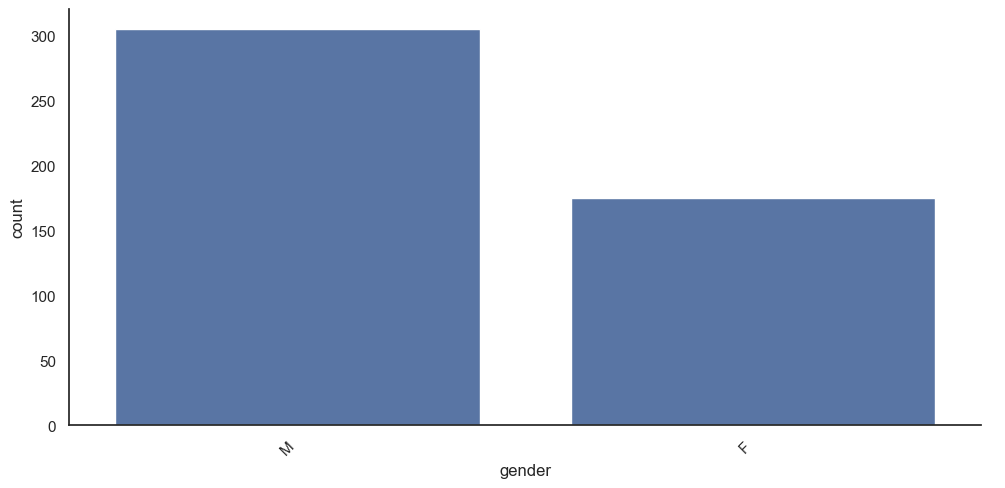

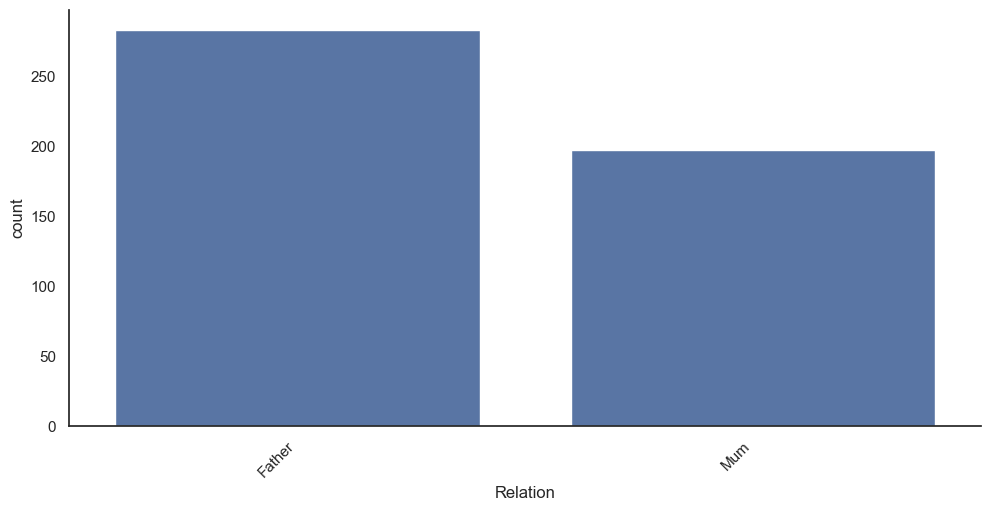

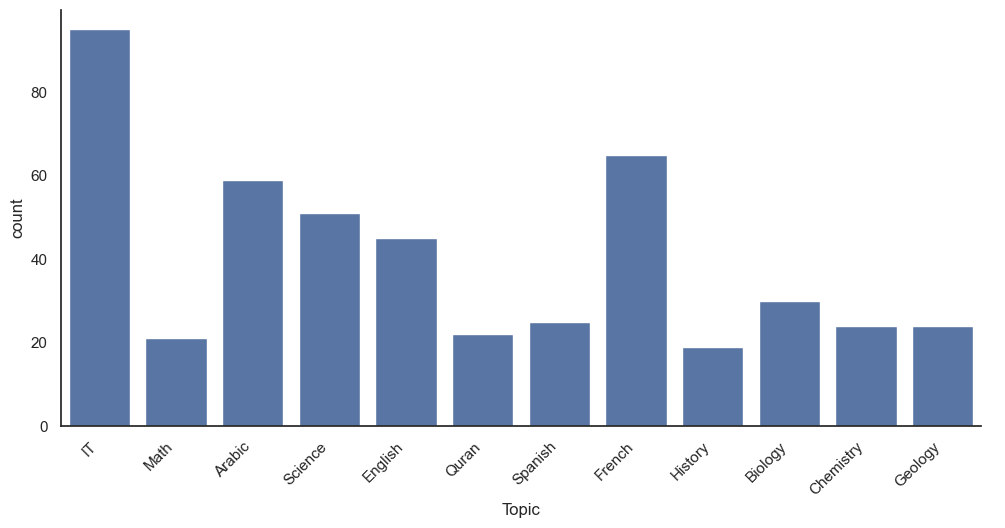

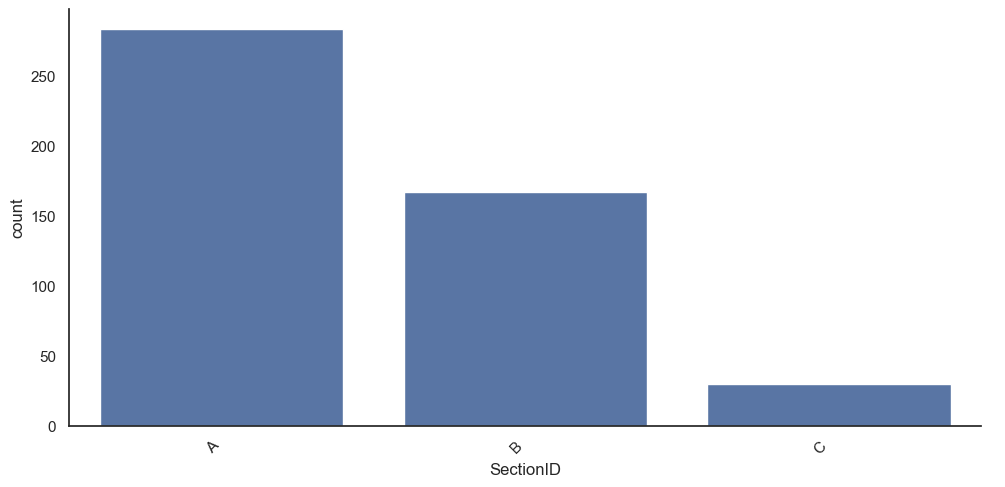

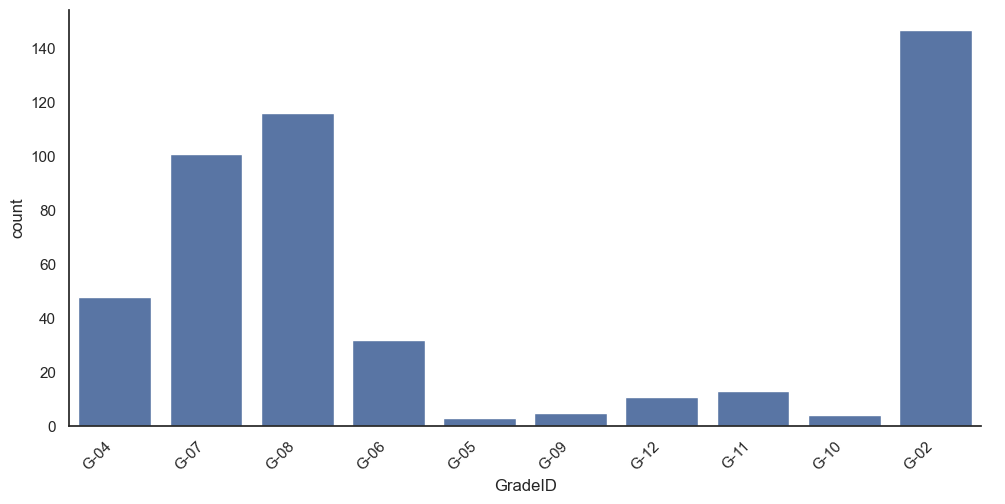

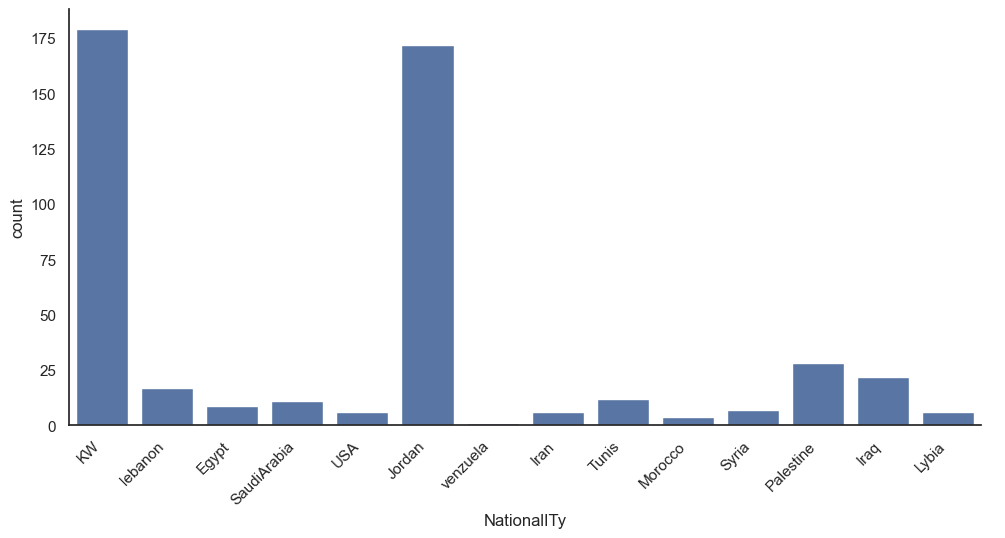

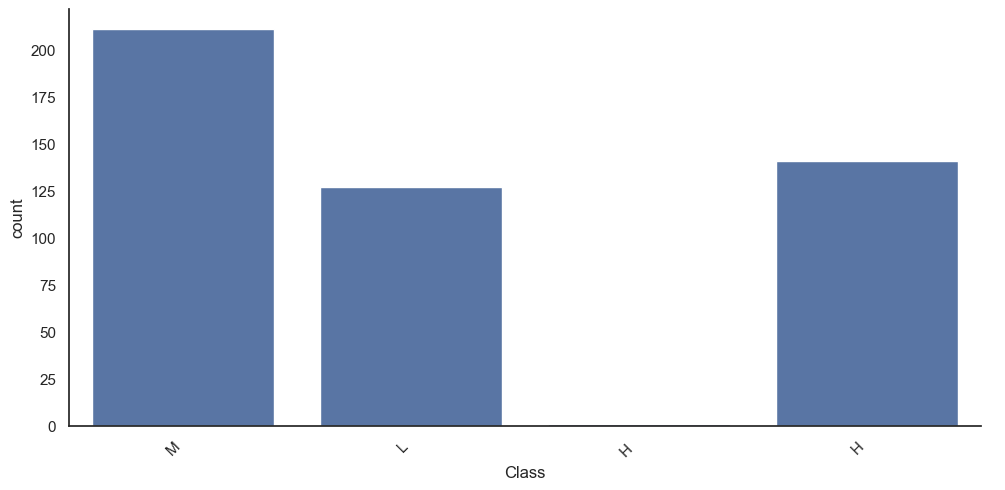

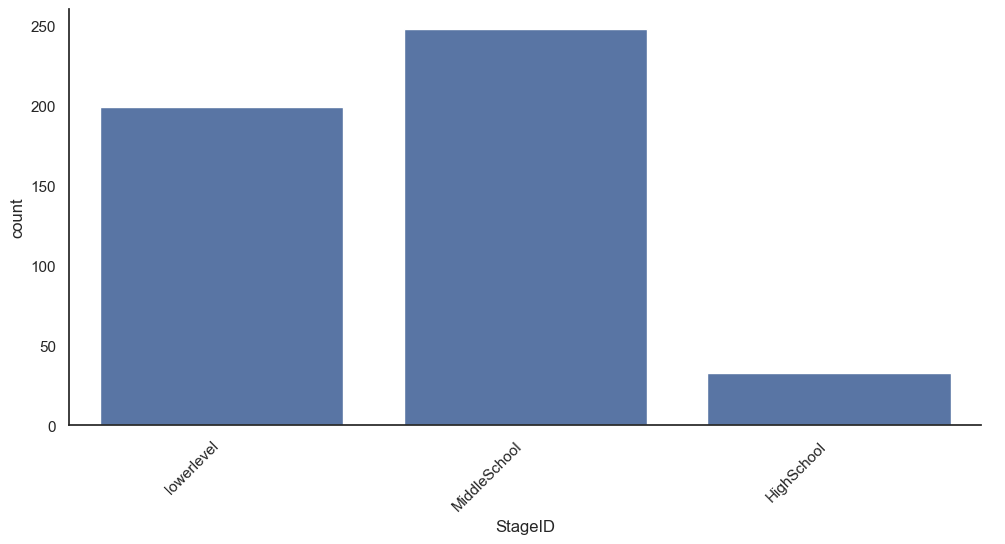

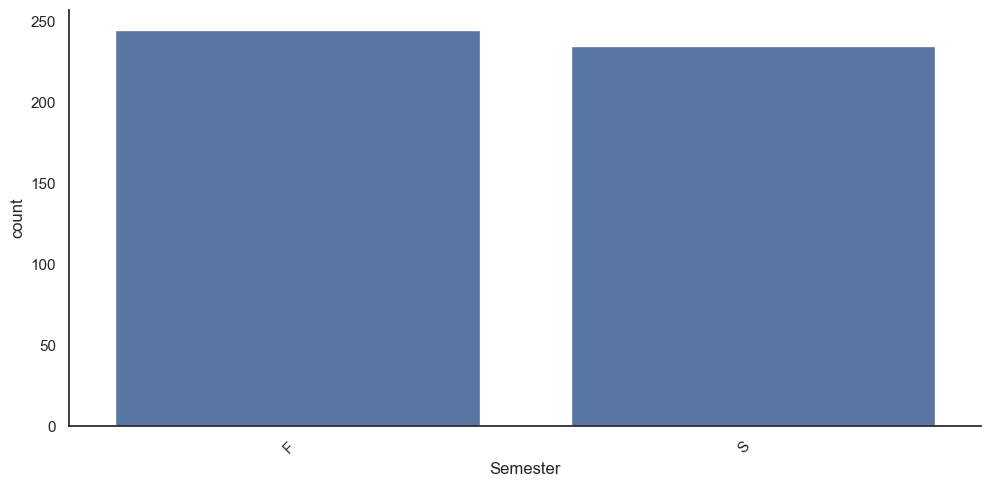

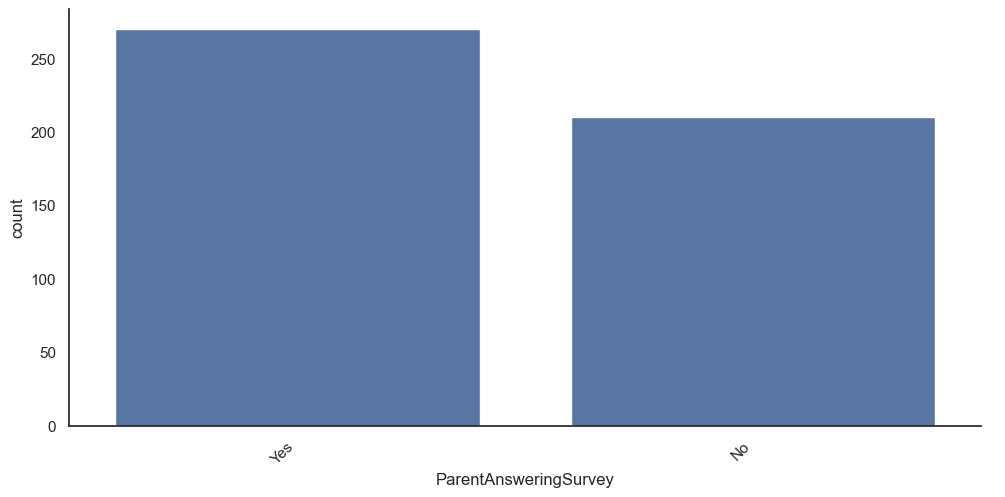

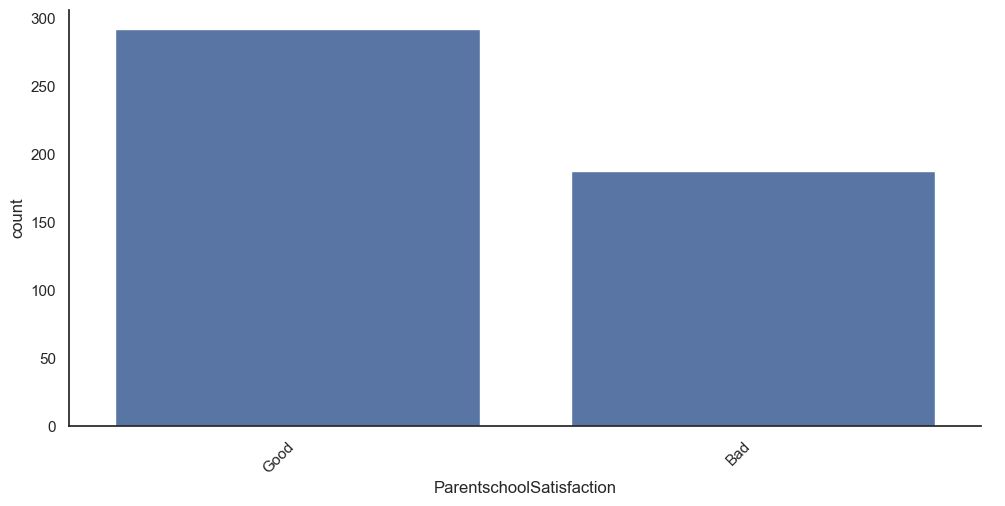

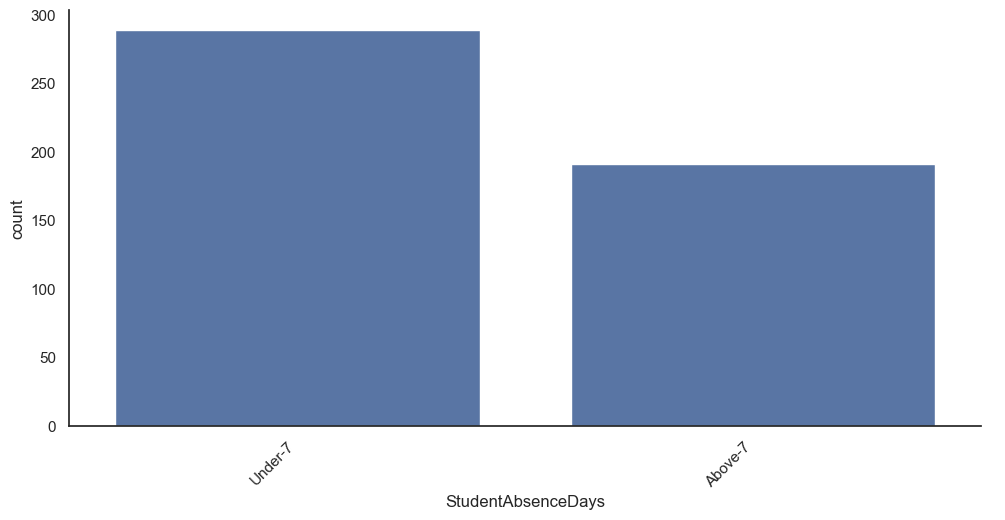

In [8]:
for i in ls:
    g = sns.catplot(x=i, data=df, kind='count', height=5, aspect=2)  
    g.set_xticklabels(rotation=45, ha='right')   


In [9]:
print (df.shape)

(480, 16)


In [10]:
target = df.pop('Class') 

In [11]:
X = pd.get_dummies(df)

In [12]:
le = LabelEncoder()
y = le.fit_transform(target) 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
ss = StandardScaler()

In [15]:
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [16]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [17]:
X_train_new = X_train
X_test_new = X_test

In [18]:
ls = ['VisITedResources','raisedhands','AnnouncementsView','StudentAbsenceDays_Above-7','StudentAbsenceDays_Under-7','Discussion'] 

In [19]:
for i in X_train.columns:
    if i in ls:
        pass
    else:
        X_train_new.drop(i , axis=1, inplace=True) 

In [20]:
for i in X_test.columns:
    if i in ls:
        pass
    else:
        X_test_new.drop(i , axis=1, inplace=True)

In [21]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)  
    cv_results = cross_val_score(model, X_train_new, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)  


LR: -1.376454 (0.140879)
LASSO: -1.388792 (0.149216)
EN: -1.392379 (0.149437)
KNN: -1.455348 (0.262694)
CART: -2.459537 (0.688768)
SVR: -1.504030 (0.298555)


In [61]:
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 

In [62]:
results = []
names = []

for name, model in pipelines:
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train_new, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 


ScaledLR: -0.668780 (0.070306)
ScaledLASSO: -0.713360 (0.074043)
ScaledEN: -0.713360 (0.074043)
ScaledKNN: -0.695280 (0.118700)
ScaledCART: -1.065062 (0.204544)
ScaledSVR: -0.687365 (0.125146)


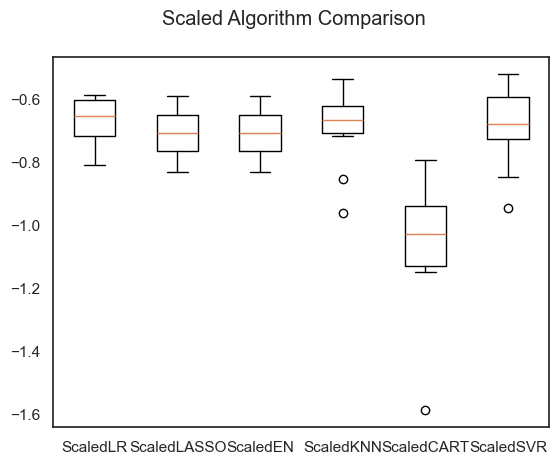

In [63]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()  